# Decision Tree - Heart disease prediction
Predict likelyhood of patient having heart disease
https://galaxyinferno.com/how-to-build-a-decision-tree-for-classification-with-python/

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataLink  = 'https://raw.githubusercontent.com/DUanalytics/datasets/master/csv/heart.csv'
df = pd.read_csv(dataLink)
df.shape

(918, 12)

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# IV and DV
X = df.drop('HeartDisease', axis=1)
y = df.HeartDisease
print(X.shape, y.shape)


(918, 11) (918,)


In [13]:
#Encoding Categorical data
# ST_Slope, ...
X_encoded = pd.get_dummies(X, drop_first = True)
X_encoded.head()
y_encoded = pd.get_dummies(y, drop_first = True)

In [14]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(642, 15) (276, 15) (642, 1) (276, 1)


In [15]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [17]:
# Accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
print(acc)

0.8007246376811594


In [20]:
#Optmising Hyperparameters
from sklearn.tree import DecisionTreeClassifier

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

In [24]:
print(' Best Accuracy - ', best_acc, ', Max Depth- ' , max_depth, ', \n Criterion - ',  criterion, ', Min Samples - ', min_samples_leaf)

 Best Accuracy -  0.8369565217391305 , Max Depth-  6 , 
 Criterion -  entropy , Min Samples -  30


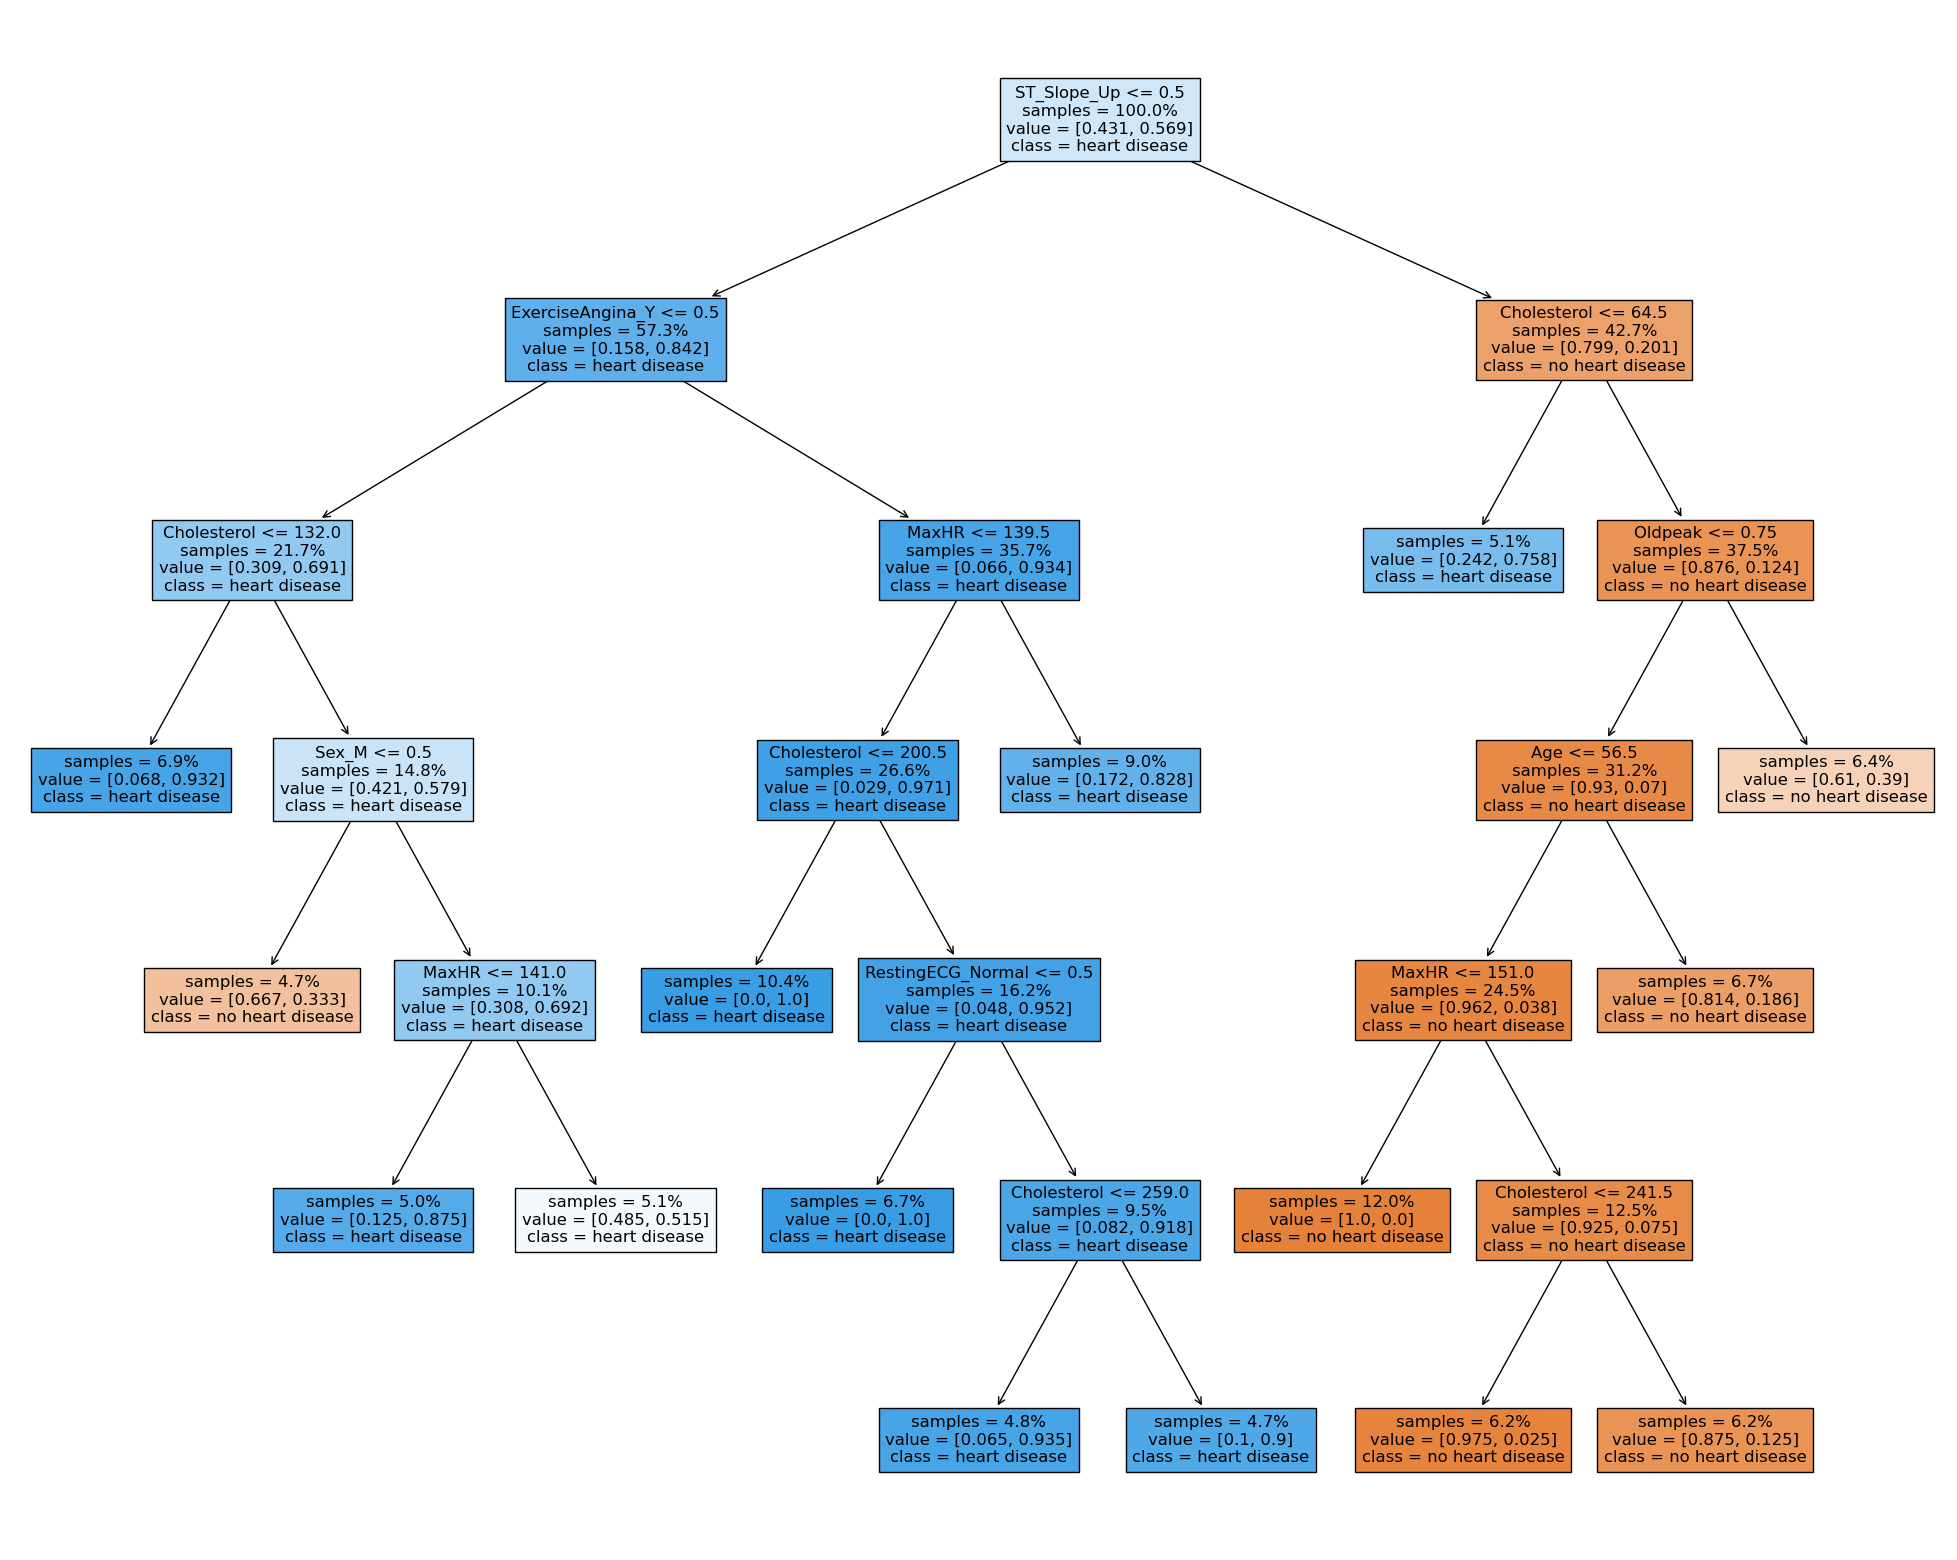

In [25]:
#Visualise
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_encoded.columns,
            class_names=['no heart disease', 'heart disease'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')